In [10]:
import pandas as pd
from matplotlib import pyplot as plt

from scipy.stats import ks_2samp, kruskal, wilcoxon
import numpy as np

In [2]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']

KeyboardInterrupt: 

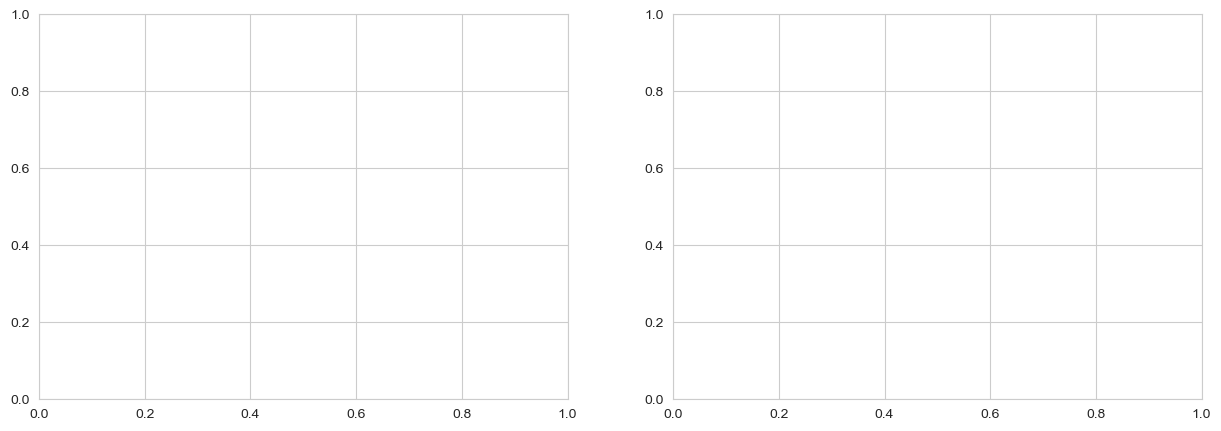

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax0, ax1 = ax
for i,pool in enumerate(pools):
        # Load the data
        raw_data =pd.read_csv(
                f"../../../Data/Datasets/{pool}/Thermo_SRM_{pool}_01_01_3xHCD-1h-R2-tryptic/peptides.txt",
                sep='\t', index_col=None)
        ax0.hist(raw_data['Mass'], bins=100, alpha=0.3, label=' '.join(pool.split('_')))
        ax1.boxplot(raw_data['Mass'], positions=[i], labels=[' '.join(pool.split('_'))])
        print(f"Pool: {pool}, Mean: {raw_data['Mass'].mean()}, Std: {raw_data['Mass'].std()}, Max: {raw_data['Mass'].max()}, Min: {raw_data['Mass'].min()}, Over 3000: {len(raw_data[raw_data['Mass'] > 2900])}")
fig.suptitle('Distribution of Mass values for all pools', fontweight='semibold')
ax0.set_title('Histogram of Mass values for all pools')
ax0.set_xlabel('Mass in Da')
ax0.legend()
ax0.set_ylabel('Nr. of Peptide')

ax1.set_title('Boxplot of Mass values for all pools')
ax1.legend()
ax1.set_ylabel('Mass in Da')
plt.subplots_adjust(top=0.85)
fig.savefig(f'../../../Data/Analysis_new/distribution_mass_values_all_pools.png')


In [15]:
# compare the distribution of the mass values
pool_49 = pd.read_csv(
        f"../../../Data/Datasets/Pool_49/Thermo_SRM_Pool_49_01_01_3xHCD-1h-R2-tryptic/peptides.txt",
        sep='\t', index_col=None)
pool_52 = pd.read_csv(f"../../../Data/Datasets/Pool_52/Thermo_SRM_Pool_52_01_01_3xHCD-1h-R2-tryptic/peptides.txt",
                      sep='\t', index_col=None)
pool_60 = pd.read_csv(f"../../../Data/Datasets/Pool_60/Thermo_SRM_Pool_60_01_01_3xHCD-1h-R2-tryptic/peptides.txt",
                      sep='\t', index_col=None)
# convert the mass values to numpy arrays
pool_49_np = pool_49['Mass'].to_numpy()
pool_52_np = pool_52['Mass'].to_numpy()
pool_60_np = pool_60['Mass'].to_numpy()

pool_49_52_60 = kruskal(pool_49_np, pool_52_np, pool_60_np)
print(pool_49_52_60)

pool49_52 =  kruskal(pool_49_np, pool_52_np)
pool49_60 =  kruskal(pool_49_np, pool_60_np)
pool52_60 =  kruskal(pool_52_np, pool_60_np)

print(f"KS test for Pool_49 and Pool_52: pvalue: {pool49_52.pvalue}, statistic: {pool49_52.statistic}")
print(f"KS test for Pool_49 and Pool_60: pvalue {pool49_60.pvalue}, statistic: {pool49_60.statistic}")
print(f"KS test for Pool_52 and Pool_60: pvalue {pool52_60.pvalue}, statistic: {pool52_60.statistic}")




KruskalResult(statistic=85.46493740894948, pvalue=2.7639147498992458e-19)
KS test for Pool_49 and Pool_52: pvalue: 4.010060729067073e-06, statistic: 21.260032184323475
KS test for Pool_49 and Pool_60: pvalue 5.877186984265844e-17, statistic: 70.01779491498466
KS test for Pool_52 and Pool_60: pvalue 4.030832971903293e-10, statistic: 39.09787106697728


Index(['Raw file', 'Scan number', 'Retention time', 'Ion injection time',
       'Total ion current', 'Collision energy', 'Summations',
       'Base peak intensity', 'Elapsed time', 'Identified', 'MS/MS IDs',
       'Sequence', 'Length', 'Filtered peaks', 'm/z', 'Mass', 'Charge', 'Type',
       'Fragmentation', 'Mass analyzer', 'Parent intensity fraction',
       'Fraction of total spectrum', 'Base peak fraction',
       'Precursor full scan number', 'Precursor intensity',
       'Precursor apex fraction', 'Precursor apex offset',
       'Precursor apex offset time', 'Scan event number', 'Modifications',
       'Modified sequence', 'Proteins', 'Score', 'Experiment',
       'Intens Comp Factor', 'CTCD Comp', 'RawOvFtT', 'AGC Fill', 'Scan index',
       'MS scan index', 'MS scan number'],
      dtype='object')
Index(['ID', 'Predicted', 'Actual', 'Similarity', 'Identity',
       'Local Alignment', 'Global Alignment', 'Normalized Local Alignment',
       'Normalized Global Alignment', 'Lev

Text(0, 0.5, 'Frequency')

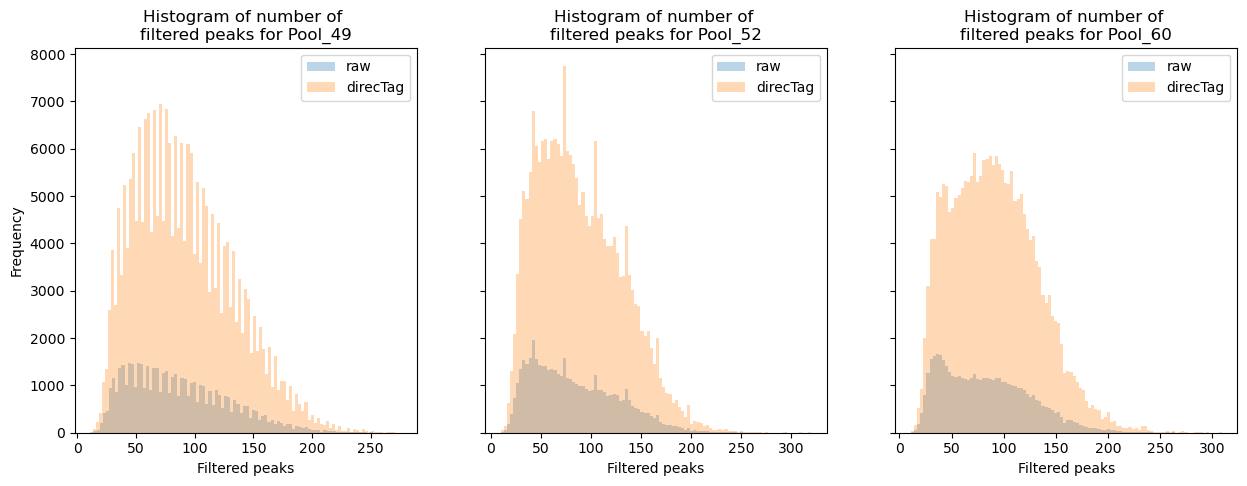

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
col = 0
for pool in pools:
        # Load the data
        raw_data =pd.read_csv(
                f"../../Data/Datasets/{pool}/Thermo_SRM_{pool}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
                sep='\t', index_col=None)
        print(raw_data.columns)
        direcTag = pd.read_csv(
                f"../../Data/ScoringResults/{pool}/direcTag_scored.tsv",
                sep='\t', index_col=None)
        print(direcTag.columns)
        merged = pd.merge(direcTag, raw_data, left_on='ID', right_on='Scan number', how='inner')
        ax[col].hist(raw_data['Filtered peaks'], bins=100, alpha=0.3, label='raw')
        ax[col].hist(merged['Filtered peaks'], bins=100, alpha=0.3, label='direcTag')
        ax[col].set_title('Histogram of number of \nfiltered peaks for ' + pool)
        ax[col].set_xlabel('Filtered peaks')
        ax[col].legend()
        col+=1

ax[0].set_ylabel('Frequency')
